# **Transforming Food Ordering with Next-Gen AI Chatbots!**

### **Problem Statement:**

Traditional food order chatbots often fail to deliver a personalized and engaging experience, leaving customers unsatisfied. These limitations manifest as repetitive interactions, a lack of context awareness, and difficulty understanding user queries. This frustration translates to lost business and a negative brand perception. Existing online ordering systems, while offering some convenience, often lack the ability to cater to specific dietary needs or preferences. This inflexibility hinders personalization and limits customer satisfaction. There's a pressing need for a cutting-edge solution that can address these shortcomings. We require a system that understands and responds to user queries in real-time, offering dynamic and creative interactions.

### **Solution:**

**Bun Buddy - A Generative AI Chatbot for Burger Shop:**

Bun Buddy aims to address the limitations of current burger ordering methods by leveraging the power of Generative AI technology.

Here's how Bun Buddy will revolutionize the ordering experience:

•	**Personalized Interactions:** Bun Buddy will engage in friendly and natural conversations, understanding individual needs and preferences. Customers can customize their burgers precisely, catering to dietary restrictions or unique tastes.


•	**Real-Time Response & Context Awareness:** Bun Buddy will understand the flow of the conversation and respond accordingly, eliminating repetitive interactions and frustrations.

•	**Enhanced Efficiency:** The user-friendly interface will streamline the ordering process, leading to faster order placement and reduced wait times.

•**Reduced Errors:** Eliminating human intervention minimizes the risk of order errors, ensuring customer satisfaction.

By implementing Bun Buddy, Burger Shop can expect several benefits:

•	**Improved Customer Satisfaction:** Personalized interactions and a user-friendly experience will lead to happier customers.

•**Increased Order Accuracy:** Eliminating human error guarantees accurate orders.

•	**Streamlined Operations:** Faster order processing leads to increased efficiency and potentially higher sales volume.


## **Burger-Bot:**

#### Let's create a burger ordering chatbot using Gradio and Gemini Pro.

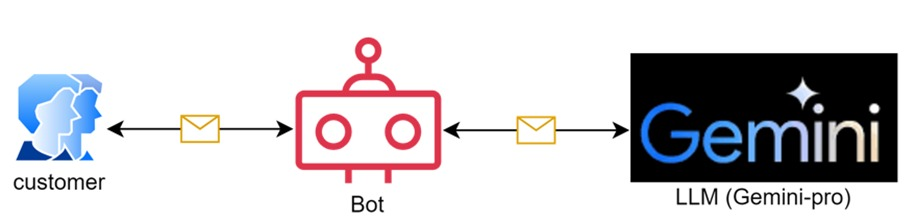

#### **Step 1:**
Import and install the necessary libraries
* Google Generative AI library allows you to work with Google's generative AI models, providing tools and interfaces for generating and managing AI content.
* The python-dotenv library is used to load environment variables from a .env file into the system's environment variables. This is useful for managing sensitive information like API keys and configuration settings.
* Gradio is a Python library used to create user-friendly web-based interfaces for machine learning models and other applications.

In [ ]:
!pip install gradio
!pip install google-generativeai
!pip instal python-dotenv
import google.generativeai as genai
import gradio as gr
from dotenv import load_dotenv
import os

#### **Step 2:**

* Configure the Gemini API Key.
* Initializing the model using genai.
* Initializing the chat using model.

In [ ]:
# Configure api_key
genai.configure(api_key=os.getenv("YOUR_GEMINI_API_KEY"))

# Define Model Instance
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

#### **Step 3:**

Create a function to send the query to the LLM and get the response in return.This function sends a message to the language model and returns the model's response.
It takes a message as input, sends it to the chat model, and then returns the response text.

In [ ]:
# Define function, which helps to execute any prompt
def get_llm_response(message):
    response = chat.send_message(message)
    return response.text

#### **Step 4:**

1. Define the Basic Information for the Bot



In [ ]:
base_info = """
You are OrderBot, an automated service to collect orders for a Burger Singh Restaurant. \
You first greet the customer, then collects the order, \
and then asks if its a pickup or delivery. \
Please do not use your own knowladge, stick within the given context only. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else.
"""

2. Define Delivery related instructions

In [ ]:
delivery_info = """If its a delivery, you ask for an address. \
Finally you collect the payment. \
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu. \
You respond in a short, very conversational friendly style. \
The menu includes"""

3. Define the Menu
   * Define available burger types

In [ ]:
burger_type = """
Desi burger for 79 Rs \
Maharaja burger for 179 Rs \
Aloo Tikki burger for 99 Rs \
Classic Cheese burger for 129 Rs \
Double Cheese burger for 179 Rs \
Heartattack burger for 1249 Rs \
"""

 * Define fries

In [ ]:
fries = "45 Rs 60 Rs 80 Rs"

  * Define available toppings

In [ ]:

toppings = """
lettuce 15 Rs  \
tomato 15 Rs  \
onion 15 Rs  \
pickles 15 Rs  \
mushrooms 15 Rs  \
extra cheese 20 Rs  \
Tandoori sauce 15 Rs  \
peppers 10 Rs
"""

  * Define Drinks

In [ ]:

drinks = """
coke 60 Rs, 45 Rs, 30 Rs \
sprite 60 Rs, 45 Rs, 30 Rs \
bottled water 50 Rs \
dolly special chai 99 Rs \
"""

#### **Step 5**

* Create the Final Prompt
    * This section initializes the context list with formatted strings containing base information,delivery information, burger type, fries, toppings, and drinks.This context will be used to generate responses from the language model.
 
 


In [ ]:
# create prompt
context = [f"""
{base_info} \
{delivery_info} \
{burger_type} \
fries: {fries} \
Toppings: {toppings} \
Drinks: {drinks} \
"""]  # accumulate messages



* Create Welcome Message
    * Append an empty string to the context list to represent a welcome message. This sets up the context for generating an initial response.

In [ ]:
# create welcome message
context.append("")
response = get_llm_response(context)

* Define Communication Function
    * This function defines how the chatbot will handle incoming messages.The function takes a message and history as input, updates the context with the new message,generates a response using the language model, updates the context with the response, and returns the response.


In [ ]:
# define communication function
def bot(message, history):
  prompt = message
  context.append(prompt)
  response = get_llm_response(context)
  context.append(response)
  return response

* Create Gradio Instance & Launch Gradio Chatbot
    * Initialize a Gradio ChatInterface with the bot function as the handler for incoming messages.The examples parameter provides example messages for users to try.The title parameter sets the initial response as the title of the chat interface.
    * Launch the Gradio interface with debugging enabled and sharing options turned on.

In [ ]:
# create gradio instance
demo = gr.ChatInterface(fn=bot, examples=["🍔🍟🥤", "Maharaja burger/Heartattack burger", "fries", "Toppings: extra cheese/ Tandoori sauce", "Drinks: dolly special chai/coke/sprite"], title=response)
# launch gradio chatbot
demo.launch(debug=True, share=True)